LMS Exploration
<br/>**10. 카메라 스티커앱 만들기 첫걸음**

개발 환경
* pixellib 설치
* pixellib 오류 해결법
* 라이브러리
* Colab GPU

데이터 정보
<br/>인물 모드 사진
<br/>고양이 모드 사진
<br/>크로마키 배경 합성 사진
<br/>사진에서 문제점 찾기
* 편집 사진 검토
* 문제점의 원인

결론
<br/>참고문헌

#개발 환경

##pixellib 설치

In [ ]:
!pip install pixellib

In [4]:
import pixellib
from pixellib.semantic import semantic_segmentation

ImportError: ignored

##pixellib 오류 해결법

[출처](https://colab.research.google.com/drive/15M8WzJuwa9wg3n0XTZESia69myPoAeSc?hl=ko)

**from pixellib.semantic import semantic_segmentation**에서
<br/>ImportError: cannot import name 'BatchNormalization' from 'tensorflow.python.keras.layers'가 발생한다.


이 에러는 **tensorflow.python.keras.layers**로 작동하는 pixellib이
<br/>**tensorflow.keras.layers**로 작동하는 다른 라이브러리와 호환되지 않아서 발생한다.

1) **pixellib, python, pytorch** 버전 확인

모듈이 업데이트 되면서 새로운 기능이 추가되고 이전 기능이 삭제되는
<br/>변경 사항을 인식하지 못하면 에러가 발생할 수 있다.
<br/>따라서 모듈의 버전을 확인하는 것은 중요하다.

**Pixellib**은 python 3.7 이상, pytorch(1.6.0, 1.7.1, 1.8.0, 1.9.0)이
<br/>설치된 개발 환경에서 작동한다. 

In [ ]:
pip show pixellib

Name: pixellib
Version: 0.7.1
Summary: PixelLib is a library used for easy implementation of semantic and instance segmentation of objects in images and videos with few lines of code.PixelLib makes it possible to train a custom segmentation model using few lines of code.PixelLib supports background editing of images and videos using few lines of code. 
Home-page: https://github.com/ayoolaolafenwa/PixelLib
Author: Ayoola Olafenwa
Author-email: UNKNOWN
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: pyQt5, dataclasses, scikit-image, future, termcolor, tqdm, black, pillow, tabulate, fvcore, matplotlib, imgaug, imantics, opencv-python, hydra-core, omegaconf, labelme2coco, yacs, iopath, cloudpickle, Cython, pydot
Required-by: 


In [ ]:
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [ ]:
import torch
print(torch.__version__)

1.11.0+cu113


[Install PixelLib and its dependencies](https://github.com/ayoolaolafenwa/PixelLib)

Google Colab에서 제공하는 Pytorch는 1.11.0+cu113 version으로
<br/>pixellib 0.7.1과 호환되지 않는다.

따라서 **ImportError: ... from 'tensorflow.python.keras.layers'**는
<br/>Pytorch 1.11.0+cu113에서 pixellib 0.7.1를 작동시킬 때 발생하는 에러라고 생각할 수 있다.



2) **pip install pixellib**의 실행 화면에서
<br/>**You must restart the runtime in order to use newly installed versions**메시지가 뜬다.
<br/>**pip install pixellib**의 실행 화면에서 아래에 있는 **Restart Runtime** 버튼을 누른다.

3) **from pixellib.semantic import semantic_segmentation**의 에러 화면에서 /usr/local/lib/python3.7/dist-packages/pixellib/semantic/deeplab.py 링크를 눌러 <br/>**deeplab.py** 코드 작성 화면으로 들어간다.

모듈(module)은 변수, 함수, 클래스 등을 모아 놓은 스크립트 파일이고
<br/>패키지(package)는 여러 모듈을 묶은 것이다.
<br/>**pixellib** 패키지의 **deeplab.py**라는 모듈을 수정하여 에러를 해결하는 방법이다.

4) 맨 윗줄의 **tensorflow.python.keras.models**에서 **.python**을 블록 설정한 뒤
<br/>ctrl + d를 누르면서 모든 **.python**를 블록 설정한다.
<br/>delete를 모든 **.python**를 눌러 삭제한다.

5) **from tensorflow.keras.utils.layer_utils import get_source_inputs**의
<br/>**.layer_utils**를 delete를 눌러 삭제한다.

6) ctrl + c를 눌러 **deeplab.py**의 변경사항을 저장한다.

7) 다시 **from pixellib.semantic import semantic_segmentation**를 실행시킨다.

In [5]:
import pixellib
from pixellib.semantic import semantic_segmentation

##라이브러리

In [6]:
import cv2
import urllib
import numpy as np
import os
from matplotlib import pyplot as plt

**cv2**는 openCV(Open Source Computer Vision Library)를 불러온다.
<br/>openCV는 계산 효율성과 실시간 처리에 중점을 둔 컴퓨터 비전 라이브러리이다.
<br/>물체 인식, 얼굴 인식, 제스처 인식, 자율주행 자동차, OCR 판독기, 불량 검사기 등에 활용한다.

**urllib.request**는 다이제스트 인증, 리디렉션, 쿠키 등과 같은 URL이나 HTTP를 여는 데 도움이 되는 함수와 클래스를 정의한다.
웹 페이지 요청 및 데이터를 가져온다.

**numpy**는 array 단위로 벡터와 행렬을 계산한다.

**os(Operating System)**는 운영체제에서 제공되는 여러 기능을 파이썬에서 수행한다. <br/>예를 들어, 파일 복사, 디렉터리 생성, 파일 목록을 구할 수 있다.

**matplotlib**은 다양한 데이터와 학습 모델을 시각화한다.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
pip freeze > '/content/drive/MyDrive/lms/library_version.txt'

In [12]:
library_name = ['pandas=', 'numpy=', 'matplotlib=', 'sklearn=', 'pixellib=', 'opencv-python=', 'urllib', ]
library_version = []
f = open('/content/drive/MyDrive/lms/library_version.txt', 'r')
line = f.readline()
while True:
    line = f.readline()
    if not line:
      break
    for i in library_name:
      if i in line:
        library_version.append(line)

f.close()

import sys
print(sys.version)
print()
print(str(library_version).replace("[","").replace("]","").replace("'","").replace("\\n","").replace(",",""), end='')

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

matplotlib==3.2.2 numpy==1.21.6 opencv-python==4.6.0.66 pandas==1.3.5 pixellib==0.7.1 sklearn==0.0 sklearn-pandas==1.8.0 urllib3==1.24.3

##Colab GPU

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Google Colab에서 할당된 GPU를 확인한다.
<br/>고용량 메모리 VM에 액세스한다.

#데이터 정보

**사진**

저작권 무료 사진 사이트 **unsplash**에서 
<br/>저작자 lau keith, Mediamodifier, Oleg Ivanov, Petr Sevcovic의 인물 사진 4장
<br/>Little Plant의 고양이 사진을 다운로드했다.

**deeplabv3_xception_tf_dim_ordering_tf_kernels.h5**
<br/>[Xception Model](https://github.com/ayoolaolafenwa/PixelLib/blob/master/Tutorials/video_pascalvoc.md)

Deeplabv3+ Xception model은 Deeplabv3+ framework에서 구성되며
<br/>Object Detection을 위한 정답 데이터,
<br/>Semantic segmentation, Instance segmentation을 학습하기 위한 label 이미지를 만드는 모델이다.

Deeplabv3+ Xception model의 원리를 이해하기 위해서는
<br/>PixelLib과 PASCAL VOC dataset의 작동 원리를 알아야 한다.



PixelLib은 Deeplabv3+ framework에서 semantic segmentation를 실행하는 라이브러리이다.
<br/>Deeplabv3+ framework은  atrous convolution에서 픽셀 단위 에측을 위해 up-sampling을 한다.
<br/>atrous convolution(diated convolution)은 기본적인 convolution과 유사하지
<br/>파라미터 개수의 증가 없이 해상도의 손실 없이 receptive field의 크기를 확장한다.

Xception model은 pascalvoc dataset에서 훈련된 모델이다.
<br/>PASCAL VOC dataset은 Object Detection dataset의 하나이다.
<br/>이를 이용하면 Object Detection에서 사용가능한 dataloader,
<br/>즉, label 데이터와 이미지를 만들 수 있다.

#인물 모드 사진

In [ ]:
model_dir = '/content/drive/MyDrive/LMS/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

pixellib에서 작동하는 deeplabv3 Xception model을 생성한다.

(3456, 5184, 3)


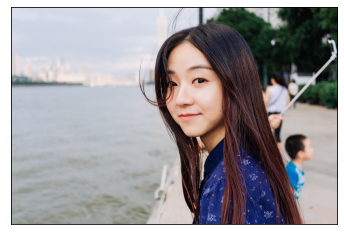

In [ ]:
img1_path = '/content/drive/MyDrive/LMS/human_segmentation/images/image1.jpg'
img1_orig = cv2.imread(img1_path) 

print(img1_orig.shape)
plt.imshow(cv2.cvtColor(img1_orig, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

In [ ]:
segvalues1, output1 = model.segmentAsPascalvoc(img1_path)

In [ ]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

PASCAL VOC 데이터의 라벨 종류는 background를 제외하면 20개의 클래스가 있다.

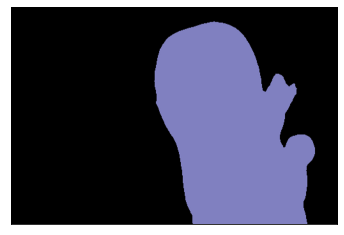

In [ ]:
plt.imshow(output1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

output에는 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨있다.

In [ ]:
segvalues1

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

segvalues에는 class_ids와 masks가 있다.
<br/>class_ids를 통해 사진에 어떤 물체가 담겨 있는지 알 수 있다.

In [ ]:
for class_id in segvalues1['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [ ]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [ ]:
print(LABEL_NAMES.index('person'))

15


라벨 person의 index는 15이다.

 segvalues에는 class_ids와 masks가 있다.

In [ ]:
colormap[15]

array([192, 128, 128])

사람을 나타내는 15번째 색상은 [192, 128, 128]이므로
<br/>추출해야 하는 색상 값은 순서를 [128, 128, 192]로 변환한다.

In [ ]:
seg_color = (128,128,192)

(3456, 5184)


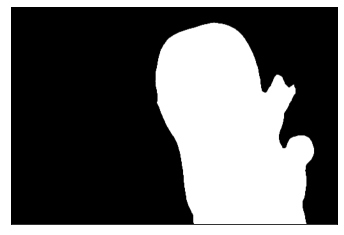

In [ ]:
seg_map1 = np.all(output1==seg_color, axis=-1)
print(seg_map1.shape)
plt.imshow(seg_map1, cmap='gray')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 된다.

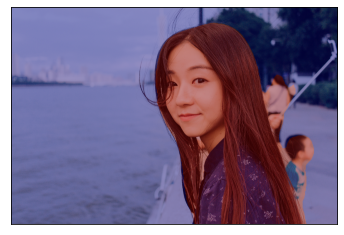

In [ ]:
img1_show = img1_orig.copy()
img1_mask = seg_map1.astype(np.uint8) * 255
color_mask1 = cv2.applyColorMap(img1_mask, cv2.COLORMAP_JET)
img1_show = cv2.addWeighted(img1_show, 0.6, color_mask1, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img1_show, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

seg_map1.astype(np.uint8)에서 True과 False인 값을 각각 255과 0으로 바꿔줍니다

cv2.applyColorMap에서 255와 0을 적당한 색상으로 바꿔봅니다

원본 이미지와 마스크를 0.6과 0.4의 비율로 합친다.

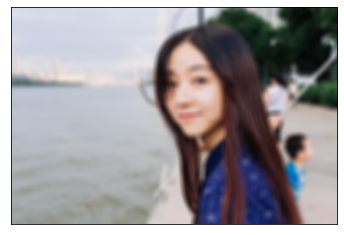

In [ ]:
img1_orig_blur = cv2.blur(img1_orig, (100,100))  
plt.imshow(cv2.cvtColor(img1_orig_blur, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

blur() 함수를 이용해 배경을 흐리게 한다.
<br/>blurring kernel size를 (100,100)을 설정한다.

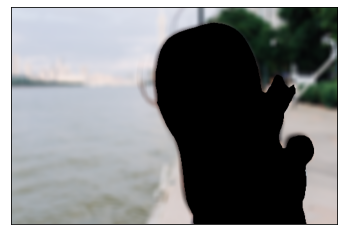

In [ ]:
img1_mask_color = cv2.cvtColor(img1_mask, cv2.COLOR_GRAY2BGR)
img1_bg_mask = cv2.bitwise_not(img1_mask_color)
img1_bg_blur = cv2.bitwise_and(img1_orig_blur, img1_bg_mask)
plt.imshow(cv2.cvtColor(img1_bg_blur, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

bitwise_not 함수를 이용하면 이미지가 반전된다.

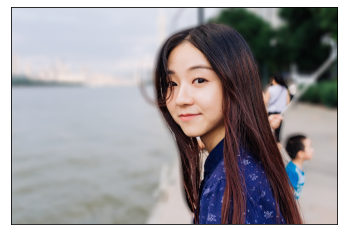

In [ ]:
img1_concat = np.where(img1_mask_color==255, img1_orig, img1_bg_blur)
plt.imshow(cv2.cvtColor(img1_concat, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

(5184, 3456, 3)


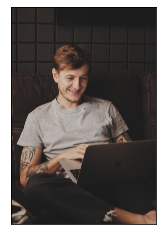

In [ ]:
img2_path = '/content/drive/MyDrive/LMS/human_segmentation/images/image2.jpg'
img2_orig = cv2.imread(img2_path) 

print(img2_orig.shape)
plt.imshow(cv2.cvtColor(img2_orig, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

In [ ]:
segvalues2, output2 = model.segmentAsPascalvoc(img2_path)

In [ ]:
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
sofa


In [ ]:
seg_map2 = np.all(output2==seg_color, axis=-1)

In [ ]:
img2_show = img2_orig.copy()
img2_mask = seg_map2.astype(np.uint8) * 255
color_mask2 = cv2.applyColorMap(img2_mask, cv2.COLORMAP_JET)
img2_show = cv2.addWeighted(img2_show, 0.6, color_mask2, 0.4, 0.0)

In [ ]:
img2_orig_blur = cv2.blur(img2_orig, (150,150))  

In [ ]:
img2_mask_color = cv2.cvtColor(img2_mask, cv2.COLOR_GRAY2BGR)
img2_bg_mask = cv2.bitwise_not(img2_mask_color)
img2_bg_blur = cv2.bitwise_and(img2_orig_blur, img2_bg_mask)

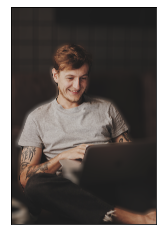

In [ ]:
img2_concat = np.where(img2_mask_color==255, img2_orig, img2_bg_blur)
plt.imshow(cv2.cvtColor(img2_concat, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

(6000, 4000, 3)


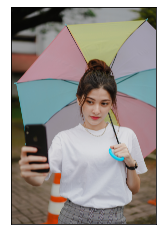

In [ ]:
img3_path = '/content/drive/MyDrive/LMS/human_segmentation/images/image3.jpg'
img3_orig = cv2.imread(img3_path) 

print(img3_orig.shape)
plt.imshow(cv2.cvtColor(img3_orig, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

In [ ]:
segvalues3, output3 = model.segmentAsPascalvoc(img3_path)

In [ ]:
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [ ]:
seg_map3 = np.all(output3==seg_color, axis=-1)

In [ ]:
img3_show = img3_orig.copy()
img3_mask = seg_map3.astype(np.uint8) * 255
color_mask3 = cv2.applyColorMap(img3_mask, cv2.COLORMAP_JET)
img3_show = cv2.addWeighted(img3_show, 0.6, color_mask3, 0.4, 0.0)

In [ ]:
img3_orig_blur = cv2.blur(img3_orig, (150,150))  

In [ ]:
img3_mask_color = cv2.cvtColor(img3_mask, cv2.COLOR_GRAY2BGR)
img3_bg_mask = cv2.bitwise_not(img3_mask_color)
img3_bg_blur = cv2.bitwise_and(img3_orig_blur, img3_bg_mask)

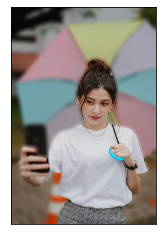

In [ ]:
img3_concat = np.where(img3_mask_color==255, img3_orig, img3_bg_blur)
plt.imshow(cv2.cvtColor(img3_concat, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

#고양이 모드 사진

(3634, 2423, 3)


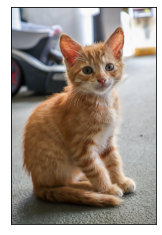

In [ ]:
img4_path = '/content/drive/MyDrive/LMS/human_segmentation/images/image4.jpg'
img4_orig = cv2.imread(img4_path) 

print(img4_orig.shape)
plt.imshow(cv2.cvtColor(img4_orig, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

In [ ]:
segvalues4, output4 = model.segmentAsPascalvoc(img4_path)

In [ ]:
for class_id in segvalues4['class_ids']:
    print(LABEL_NAMES[class_id])

background
car
cat
motorbike


In [ ]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

In [ ]:
print(LABEL_NAMES.index('cat'))

8


PASCAL VOC 데이터의 라벨 종류에는 cat이 있다.
<br/>라벨 cat의 index는 8이다.

In [ ]:
colormap[8]

array([64,  0,  0])

In [ ]:
cat_seg_color = (0, 0, 64)

사람을 나타내는 78번째 색상은 [64, 0, 0]이므로
<br/>추출해야 하는 색상 값은 순서를 [0, 0, 64]로 변환한다.

In [ ]:
seg_map4 = np.all(output4 == cat_seg_color, axis=-1)

In [ ]:
img4_show = img4_orig.copy()
img4_mask = seg_map4.astype(np.uint8) * 255
color_mask4 = cv2.applyColorMap(img4_mask, cv2.COLORMAP_JET)
img4_show = cv2.addWeighted(img4_show, 0.6, color_mask4, 0.4, 0.0)

In [ ]:
img4_orig_blur = cv2.blur(img4_orig, (150,150))  

In [ ]:
img4_mask_color = cv2.cvtColor(img4_mask, cv2.COLOR_GRAY2BGR)
img4_bg_mask = cv2.bitwise_not(img4_mask_color)
img4_bg_blur = cv2.bitwise_and(img4_orig_blur, img4_bg_mask)

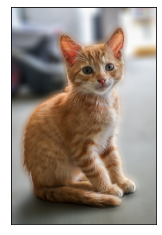

In [ ]:
img4_concat = np.where(img4_mask_color==255, img4_orig, img4_bg_blur)
plt.imshow(cv2.cvtColor(img4_concat, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

#크로마키 배경 합성 사진

(5472, 3648, 3)


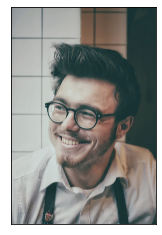

In [ ]:
img5_path = '/content/drive/MyDrive/LMS/human_segmentation/images/image5.jpg'
img5_orig = cv2.imread(img5_path) 

print(img5_orig.shape)
plt.imshow(cv2.cvtColor(img5_orig, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

In [ ]:
segvalues5, output5 = model.segmentAsPascalvoc(img5_path)

In [ ]:
for class_id in segvalues5['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [ ]:
seg_map5 = np.all(output5==seg_color, axis=-1)

In [ ]:
img5_show = img5_orig.copy()
img5_mask = seg_map5.astype(np.uint8) * 255
img5_mask_color = cv2.cvtColor(img5_mask, cv2.COLOR_GRAY2BGR)

In [ ]:
ChromaKey_path = '/content/drive/MyDrive/LMS/human_segmentation/images/ChromaKey.jpg'
ChromaKey_orig = cv2.imread(ChromaKey_path) 
print(img5_orig.shape)

(5472, 3648, 3)


In [ ]:
width = img5_orig.shape[1]
height = img5_orig.shape[0]
dim = (width, height)
 
# resize image
ChromaKey_resized = cv2.resize(ChromaKey_orig, dim, interpolation = cv2.INTER_AREA)
print(ChromaKey_resized.shape)

(5472, 3648, 3)


ChromaKey_resized.shape를 img5_orig.shape로 resize한다.

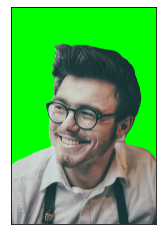

In [ ]:
img5_concat = np.where(img5_mask_color==255, img5_orig, ChromaKey_resized)
plt.imshow(cv2.cvtColor(img5_concat, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

크로마키 사진과 인물 사진을 합친다.
<br/>세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고
<br/>255가 아닌 영역은 크로마키 이미지 값을 사용한다.

#사진에서 문제점 찾기

##편집 사진 검토

In [ ]:
import numpy as np

In [ ]:
seg_image1 = img1_concat
cv2.imwrite("/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image1.jpg", seg_image1)

seg_image2 = img2_concat
cv2.imwrite("/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image2.jpg", seg_image2)

seg_image3 = img3_concat
cv2.imwrite("/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image3.jpg", seg_image3)

seg_image4 = img4_concat
cv2.imwrite("/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image4.jpg", seg_image4)

seg_image5 = img5_concat
cv2.imwrite("/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image5.jpg", seg_image5)

True

pixellib로 편집한 이미지 파일을 저장한다.

In [ ]:
seg_image1_path = '/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image1.jpg'
seg_image1_orig = cv2.imread(seg_image1_path) 
seg_image1_show = cv2.cvtColor(seg_image1_orig, cv2.COLOR_BGR2RGB)

seg_image2_path = '/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image2.jpg'
seg_image2_orig = cv2.imread(seg_image2_path) 
seg_image2_show = cv2.cvtColor(seg_image2_orig, cv2.COLOR_BGR2RGB)

seg_image3_path = '/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image3.jpg'
seg_image3_orig = cv2.imread(seg_image3_path) 
seg_image3_show = cv2.cvtColor(seg_image3_orig, cv2.COLOR_BGR2RGB)

seg_image4_path = '/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image4.jpg'
seg_image4_orig = cv2.imread(seg_image4_path) 
seg_image4_show = cv2.cvtColor(seg_image4_orig, cv2.COLOR_BGR2RGB)

seg_image5_path = '/content/drive/MyDrive/LMS/human_segmentation/images/seg_image/seg_image5.jpg'
seg_image5_orig = cv2.imread(seg_image5_path) 
seg_image5_show = cv2.cvtColor(seg_image5_orig, cv2.COLOR_BGR2RGB)

문제점을 분석한 이미지 파일을 불러온다.

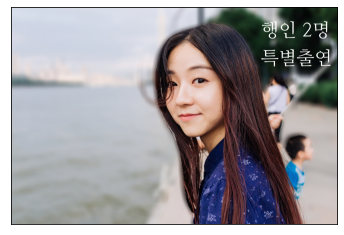

In [ ]:
plt.imshow(seg_image1_show)  
plt.xticks([])  
plt.yticks([]) 
plt.show()

행인 2명까지 함께 아웃포커싱의 영역에 포함되었다.

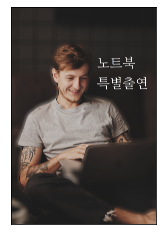

In [ ]:
plt.imshow(seg_image2_show)  
plt.xticks([])  
plt.yticks([]) 
plt.show()

노트북 모니터의 테두리와 키보드의 일부가 함께 아웃포커싱의 영역에 포함되었다.

노트북의 색깔과 인물의 티셔츠 색깔이 비슷한 회색이라서
<br/>모두 아웃포커싱의 영역으로 포함시킨 것으로 보인다.

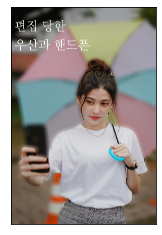

In [ ]:
plt.imshow(seg_image3_show)  
plt.xticks([])  
plt.yticks([]) 
plt.show()

우산과 핸드폰의 일부가 아웃포커싱 영역에서 제외되었다.

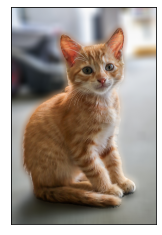

In [ ]:
plt.imshow(seg_image4_show)  
plt.xticks([])  
plt.yticks([]) 
plt.show()

고양이 사진에서는 문제점이 발견되지 않았다.

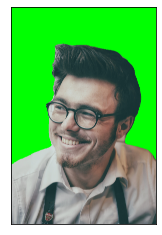

In [ ]:
plt.imshow(seg_image5_show)  
plt.xticks([])  
plt.yticks([]) 
plt.show()

크로마키 사진에서는 문제점이 발견되지 않았다.

##문제점의 원인

In [ ]:
for i in range(len(LABEL_NAMES)):
  if i % 4 == 0 and i != 0:
    print()
    print(LABEL_NAMES[i-4:i], end='')
print(LABEL_NAMES[-1:])
print() 


['background', 'aeroplane', 'bicycle', 'bird']
['boat', 'bottle', 'bus', 'car']
['cat', 'chair', 'cow', 'diningtable']
['dog', 'horse', 'motorbike', 'person']
['pottedplant', 'sheep', 'sofa', 'train']['tv']



PASCAL VOC 데이터의 라벨 종류를 살펴본다.

20개의 클래스로 사진에서 특정 영역을 추출한다.
<br/>인물 영역을 추출하고 싶으면 segvalues의 class_ids에서 라벨 person을 할당한다.

이렇게 라벨에 의한 세그멘테이션 방식을 살펴보면서 문제점의 원인을 파악한다.

* **배경에 여러 인물이 있을 때**
<br/>인물이 여러 명일 때 그 중 1명의 피사체가 누구인지 예측할 수 없다.
<br/>모든 인물이 라벨 person에 포함되기 때문에 모두 아웃포커싱 영역에 포함되는 것이다.

* **배경에 있는 주변 사물을 블러 처리할 때**
<br/>인물의 색깔과 주변 사물의 색깔이 비슷하면 헷갈려서 그 라벨을 인식하는 경계를 구별하지 못한다.
<br/>만약 인물의 옷과 겹치는 주변 사물이 모두 비슷한 회색이면
<br/>인물의 라벨 person과 주변 사물이 있는 background 라벨 영역의 경계를 어디까지 지어야할지 구별하지 못한다.

* **인물과 함께 주변 사물을 아웃포커싱할 때**
<br/>주변 사물을 배경으로 예측하여 인물 영역만 아웃포커싱한다.
<br/>만약 인물이 들고 있는 우산과 핸드폰까지 아웃포커싱 영역에 포함시키고 싶지만
<br/>우산과 핸드폰은 umbrella와 phone이라는 고유의 라벨이 존재하지 않기 때문에
<br/>배경 backgorund 라벨로 분류되어 아웃포커싱 영역에서 제외된다.

#결론

* Segmentation Label을 만드는 Xception model은 PASCAL VOC dataset에서 훈련된 모델이라는데
<br/>그 모델 훈련 과정을 알아보고 싶다.

*  Xception model의 라벨을 늘릴 수 한계는 어느정도일까?
<br/>라벨이 많으면 많을수록 사진이 구별할 수 있는 사물의 개수는 많아진다.
<br/>그러나 모델의 예측 성능을 높게 유지할 수 있을까?

#참고문헌

**단행본**
<br/>남재윤, 파이썬 코딩도장, 길벗, 2018
<br/>[Unit 45. 모듈과 패키지 만들기](https://dojang.io/mod/page/view.php?id=2447)

<br/>**깃허브**
<br/>[PixelLib 공식 홈페이지](https://github.com/ayoolaolafenwa/PixelLib)
<br/>[Semantic segmentation of videos with PixelLib using Pascalvoc model](https://github.com/ayoolaolafenwa/PixelLib/blob/master/Tutorials/video_pascalvoc.md)
<br/>[PASCAL VOC Dataset](https://deepbaksuvision.github.io/Modu_ObjectDetection/posts/02_01_PASCAL_VOC.html)

<br/>**웹사이트**
<br/>[Python 모듈 버전 확인](https://www.delftstack.com/ko/howto/python/module-version-python/)
<br/>[python urllib 핵심 기초 정리](https://han-py.tistory.com/320)
<br/>[The Evolution of Deeplab for Semantic Segmentation](https://towardsdatascience.com/the-evolution-of-deeplab-for-semantic-segmentation-95082b025571)
<br/>[prat Ⅶ Semantic Segementation 5. Dilated Convolution 라온피플 머신러닝 아카데미](https://blog.naver.com/laonple/220991967450)